In [ ]:
## Lab - EDA Univariate Analysis: Diving into Amazon UK Product Insights

**Objective**: Explore the product listing dynamics on Amazon UK to extract actionable business insights. By understanding the distribution, central tendencies, and relationships of various product attributes, businesses can make more informed decisions on product positioning, pricing strategies, and inventory management.

**Dataset**: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.



In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

csv = '/Users/catherinewu/Downloads/amz_uk_price_prediction_dataset.csv'

df_amz = pd.read_csv(csv)


In [8]:
df_amz

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [19]:
freq_prod = df_amz['category'].value_counts()
pd.set_option('display.max_rows', None)
freq_prod

category
Sports & Outdoors                                   836265
Beauty                                               19312
Handmade Clothing, Shoes & Accessories               19229
Bath & Body                                          19092
Birthday Gifts                                       18978
Manicure & Pedicure Products                         18940
Skin Care                                            18769
Make-up                                              18756
Hair Care                                            18735
Fragrances                                           18564
Handmade Gifts                                       18295
Handmade Home Décor                                  18146
Luggage and travel gear                              18142
Handmade Jewellery                                   18044
Handmade Artwork                                     17878
Women                                                17772
Handmade Home & Kitchen Products               

In [23]:
top5 = df_amz['category'].value_counts().head(5)
top5

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

In [25]:
prop_prod = df_amz['category'].value_counts(normalize=True)
prop_prod

category
Sports & Outdoors                                   0.342219
Beauty                                              0.007903
Handmade Clothing, Shoes & Accessories              0.007869
Bath & Body                                         0.007813
Birthday Gifts                                      0.007766
Manicure & Pedicure Products                        0.007751
Skin Care                                           0.007681
Make-up                                             0.007675
Hair Care                                           0.007667
Fragrances                                          0.007597
Handmade Gifts                                      0.007487
Handmade Home Décor                                 0.007426
Luggage and travel gear                             0.007424
Handmade Jewellery                                  0.007384
Handmade Artwork                                    0.007316
Women                                               0.007273
Handmade Home &

In [29]:
my_table = pd.crosstab(index = df_amz['category'], columns="count").sort_values(by="count", ascending=False)
my_table

col_0,count
category,
Sports & Outdoors,836265
Beauty,19312
"Handmade Clothing, Shoes & Accessories",19229
Bath & Body,19092
Birthday Gifts,18978
Manicure & Pedicure Products,18940
Skin Care,18769
Make-up,18756
Hair Care,18735


In [31]:
prop_table = (my_table/my_table.sum()).round(2)
prop_table

col_0,count
category,
Sports & Outdoors,0.34
Beauty,0.01
"Handmade Clothing, Shoes & Accessories",0.01
Bath & Body,0.01
Birthday Gifts,0.01
Manicure & Pedicure Products,0.01
Skin Care,0.01
Make-up,0.01
Hair Care,0.01


/var/folders/s6/0v7n1v2x6j33b91n4fvvkdr00000gn/T/ipykernel_32984/1066313661.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5.index, y=top5.values, palette="Set3")


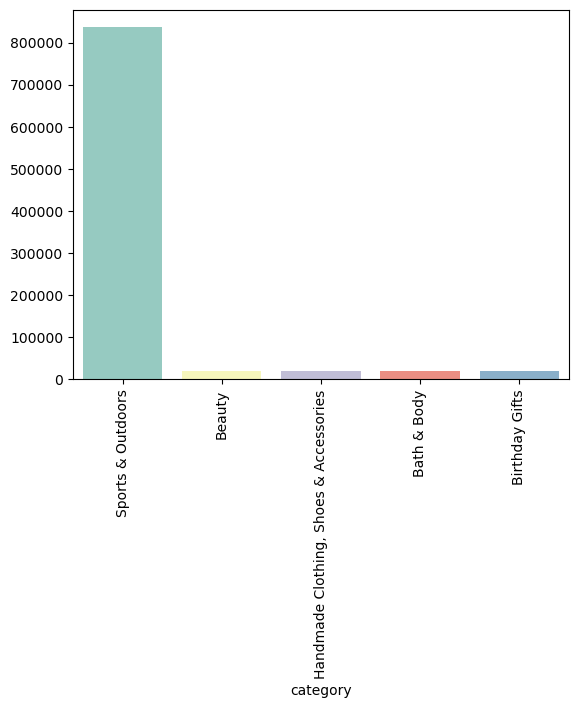

In [48]:
sns.barplot(x=top5.index, y=top5.values, palette="Set3")
plt.xticks(rotation=90)

plt.show()

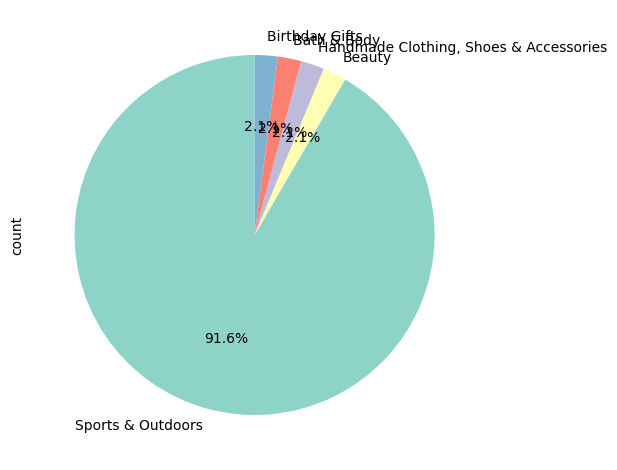

In [62]:
df_amz['category'].value_counts().head(5).plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))
plt.tight_layout()
plt.show()



**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 

In [77]:
mean_price = df_amz['price'].mean()
median_price = df_amz['price'].median()
mode_price = df_amz['price'].mode()[0]

mean_price, median_price, mode_price

(89.24380943923663, 19.09, 9.99)

In [81]:
variance_price = df_amz['price'].var()
std_dev_price = df_amz['price'].std()
min_price = df_amz['price'].min()
max_price = df_amz['price'].max()
range_price = max_price - min_price
quantiles_price = df_amz['price'].quantile([0.25, 0.5, 0.75])

variance_price, std_dev_price, min_price, max_price, range_price, quantiles_price

(119445.4853225653,
 345.6088617535223,
 0.0,
 100000.0,
 100000.0,
 0.25     9.99
 0.50    19.09
 0.75    45.99
 Name: price, dtype: float64)

In [98]:
df_amz['price'].describe().round(2)

count    2443651.00
mean          89.24
std          345.61
min            0.00
25%            9.99
50%           19.09
75%           45.99
max       100000.00
Name: price, dtype: float64

In [87]:
skewness_price = df_amz['price'].skew()
kurtosis_price = df_amz['price'].kurtosis()

skewness_price, kurtosis_price

(27.492977566280338, 4241.616412866518)

Skewness of 'price': (27.49)
Kurtosis of 'price': (4241.61)

The skewness and kurtosis values suggest that there are some products that are sold at significantly higher prices than the majority, and these are affecting the overall distribution of house prices in the dataset.

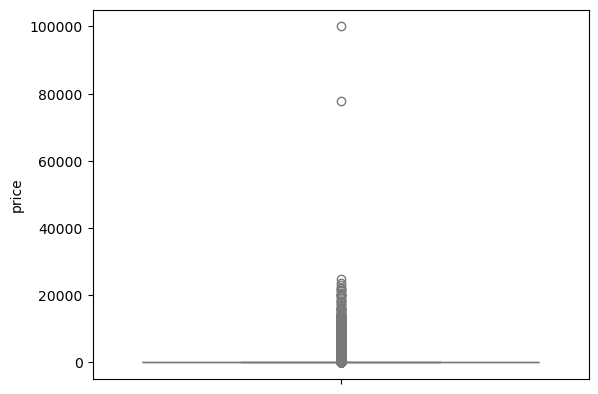

In [89]:
# Plotting a boxplot for the 'SalePrice' column with a light blue color
sns.boxplot(data = df_amz['price'], color="lightblue")
plt.show()

### Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?

3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?

4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

In [96]:
df_amz['stars'].describe().round(2)

count    2443651.00
mean           2.15
std            2.19
min            0.00
25%            0.00
50%            0.00
75%            4.40
max            5.00
Name: stars, dtype: float64

at least half of the reviews are 0.
there is a great variation of 2.19 in the feedback.

In [100]:
skewness_price = df_amz['stars'].skew()
kurtosis_price = df_amz['stars'].kurtosis()

skewness_price, kurtosis_price

(0.08120735761080985, -1.9260061280432985)

it is not normally distributed, rather it's a negative skew as they lean towards lower values

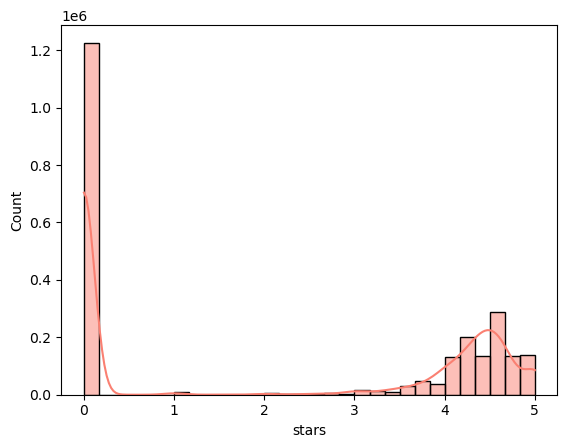

In [107]:
sns.histplot(df_amz['stars'], kde=True, bins=30, color="salmon")
plt.show()